📂 Upload your CSV file(s) (you can select multiple)...


Saving test_dataset.csv to test_dataset (8).csv
Saving train_dataset.csv to train_dataset (8).csv
Saving update_temperature.csv to update_temperature (8).csv
Saving Weather Data.csv to Weather Data (9).csv
Saving weatherHistory.csv to weatherHistory (7).csv

✅ Data Loaded
Shape: (8784, 53)
Columns: ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Year', 'Country', 'Avg_Temperature_degC', 'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm', 'Rainfall_mm', 'Population', 'Renewable_Energy_pct', 'Extreme_Weather_Events', 'Forest_Area_pct', 'Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather', 'Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', '

/tmp/ipython-input-2957373122.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.values, y=event_counts.index, palette="viridis")


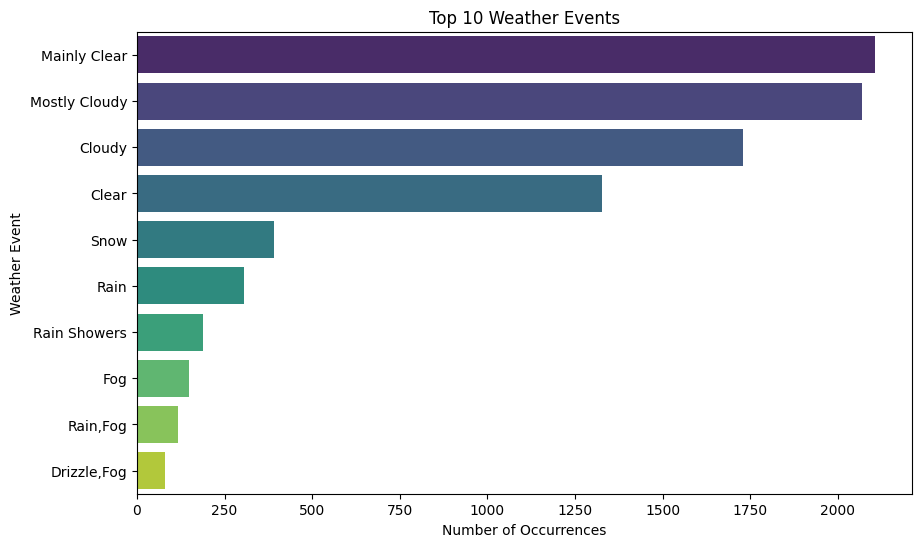

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


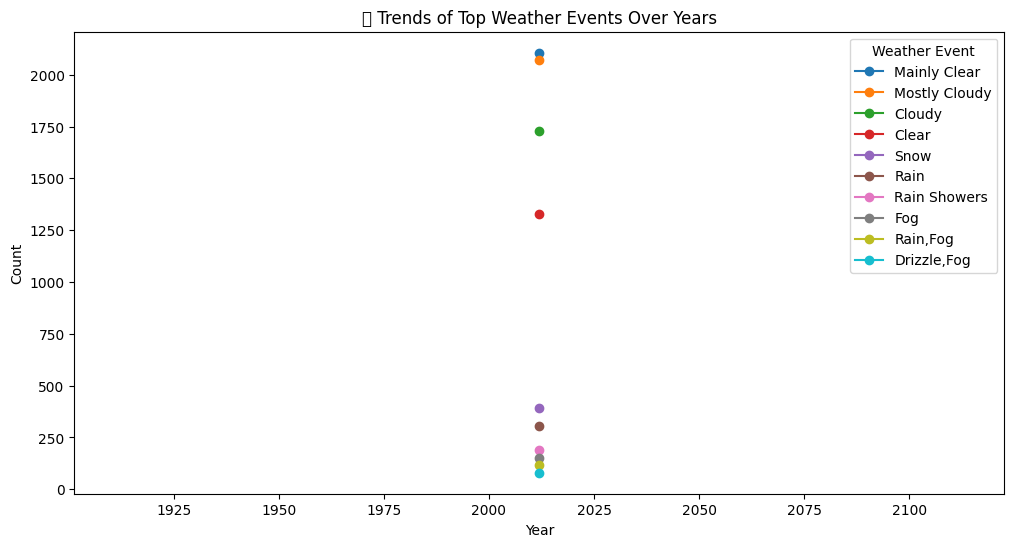


✅ Project Analysis Complete!


In [1]:
# ==========================
# Weather Events Analysis Project
# ==========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --------------------------
# 1️⃣ Upload CSV files
# --------------------------
print("📂 Upload your CSV file(s) (you can select multiple)...")
uploaded = files.upload()  # user selects CSV(s)

# Merge uploaded CSVs if multiple
datasets = [pd.read_csv(f) for f in uploaded.keys()]
df = pd.concat(datasets, ignore_index=True)

# --------------------------
# 2️⃣ Convert Date/Time
# --------------------------
if 'Date/Time' in df.columns:
    df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')
    df.dropna(subset=['Date/Time'], inplace=True)
    df['Year'] = df['Date/Time'].dt.year.astype(int)
    df['Month'] = df['Date/Time'].dt.month

print("\n✅ Data Loaded")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# --------------------------
# 3️⃣ Total Weather Events
# --------------------------
total_events = df['Weather'].count()
print(f"\n🌦️ Total number of weather events: {total_events}")

# --------------------------
# 4️⃣ Top 10 Weather Events with Percentage
# --------------------------
event_counts = df['Weather'].value_counts().head(10)
event_percent = (event_counts / total_events * 100).round(2)

print("\n🔥 Top 10 Weather Events with Percentage:")
top_events = pd.DataFrame({
    'Event': event_counts.index,
    'Count': event_counts.values,
    'Percentage': event_percent.values
})
print(top_events)

# Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x=event_counts.values, y=event_counts.index, palette="viridis")
plt.xlabel("Number of Occurrences")
plt.ylabel("Weather Event")
plt.title("Top 10 Weather Events")
plt.show()

# --------------------------
# 5️⃣ Trends Over Years
# --------------------------
if 'Year' in df.columns:
    event_trends = df.groupby(['Year','Weather']).size().unstack(fill_value=0)

    plt.figure(figsize=(12,6))
    event_trends[top_events['Event']].plot(marker="o", figsize=(12,6))
    plt.title("📈 Trends of Top Weather Events Over Years")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.legend(title="Weather Event")
    plt.show()

print("\n✅ Project Analysis Complete!")
